<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Many states have seen drastic changes in participation rates for both the ACT and the SAT between 2017 and 2018. This analysis seeks to find out if the remainder of the states should also change over to the other respective test.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

##### act_2017: average state participation and scores, categorized into each subject as well as the composite in 2017

##### sat_2017: average state participation, composite score, and categorized scores in each subject in 2017

##### act_2018_update: average state participation and scores, categorized into each subject as well as the composite in 2018

##### sat_2018: average state participation, composite score, and categorized scores in each subject in 2018

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

#### Additional research was conducted in order to double check the accuracy of the data given.
* Comprehensive 2017/2018 SAT scores:
https://nces.ed.gov/programs/digest/d19/tables/dt19_226.40.asp

* Comprehensive 2018 ACT scores: https://nces.ed.gov/programs/digest/d18/tables/dt18_226.60.asp

#### According to these sources, which was published by the National Center for Education Statistics(NCES) there were some differences in their data when compared to the data provided.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def get_mean(nums):
    n = len(nums)
    sum_nums = sum(nums)
    mean = sum_nums / n
    return(mean)

In [2]:
list_nums = [1, 3, 5, 6, 7, 8, 10, 11]
get_mean(list_nums)

6.375

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def get_std_dev(nums):
        n = len(nums)
        mean = get_mean(nums)
        var = sum((x - mean) ** 2 for x in nums) / n
        std_dev = var ** 0.5
        return std_dev

In [4]:
test_nums = [7, 2, 4, 3, 9, 12, 10, 1]
get_std_dev(test_nums)

3.8078865529319543

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Code:
def percent_to_float(num):
    return float(num.strip('%'))/100

In [6]:
print(percent_to_float('40%'))
print(percent_to_float('3.5432%'))
print(percent_to_float('19.11%'))
print(percent_to_float('0.0005%'))

0.4
0.035432
0.1911
5e-06


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [7]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### ACT 2017 Data

In [8]:
act_2017_path = '/Users/sangs/ga-blog/Project_1/project_1/data/act_2017.csv'
act_2017 = pd.read_csv(act_2017_path)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [9]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [10]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### There is an abnormal observation of minimum at 2.3 for the Science category

In [11]:
act_2017[['State','Science']]

,State,Science
0,National,21.0
1,Alabama,19.4
2,Alaska,19.9
3,Arizona,19.8
4,Arkansas,19.5
5,California,22.2
6,Colorado,20.9
7,Connecticut,24.6
8,Delaware,23.6
9,District of Columbia,23.5


Maryland has an average score of 2.3
* according to `https://nces.ed.gov/programs/digest/d17/tables/dt17_226.60.asp`, the value should be 23.2

In [12]:
act_2017.loc[21, 'Science'] = 23.2

#### The data type for the column `Composite` is an object when it should be a float; further evaluation is needed to see why

In [13]:
# Checking to see which variable is causing the column to be an object
act_2017.Composite

0      21.0
1      19.2
2      19.8
3      19.7
4      19.4
5      22.8
6      20.8
7      25.2
8      24.1
9      24.2
10     19.8
11     21.4
12     19.0
13     22.3
14     21.4
15     22.6
16     21.9
17     21.7
18     20.0
19     19.5
20     24.3
21     23.6
22     25.4
23     24.1
24     21.5
25     18.6
26     20.4
27     20.3
28     21.4
29     17.8
30     25.5
31     23.9
32     19.7
33     24.2
34     19.1
35     20.3
36     22.0
37     19.4
38     21.8
39     23.7
40     24.0
41     18.7
42     21.8
43     19.8
44     20.7
45     20.3
46     23.6
47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [14]:
# Replace 20.2x with 20.2
act_2017.Composite = act_2017.Composite.replace('20.2x', 20.2)

In [15]:
act_2017.Composite = pd.to_numeric(act_2017.Composite)

In [16]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [17]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [18]:
act_2017['Participation'] = act_2017['Participation'].map(lambda x: percent_to_float(x))

In [19]:
act_2017.columns = act_2017.columns.str.lower()

In [20]:
act_2017.rename(columns = {'participation':'act_2017_part',
                          'english':'act_2017_english',
                          'math':'act_2017_math',
                          'reading':'act_2017_reading',
                          'science':'act_2017_science',
                          'composite':'act_2017_composite'},
               inplace = True)

In [21]:
act_2017.columns

Index(['state', 'act_2017_part', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')

#### Compared to the sat_2017 dataset, the act_2017 data has an additional row consisting of the National average. It should be considered to drop as there is no comparative data to it.

In [22]:
act_2017 = act_2017.drop([0])

In [23]:
act_2017.head(3)

,state,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7


### SAT 2017 Data

In [24]:
sat_2017_path = '/Users/sangs/ga-blog/Project_1/project_1/data/sat_2017.csv'
sat_2017 = pd.read_csv(sat_2017_path)
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [25]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [26]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


The `min` for Math is abnormally low at 52.

In [27]:
sat_2017[['State', 'Math']]

,State,Math
0,Alabama,572
1,Alaska,533
2,Arizona,553
3,Arkansas,594
4,California,524
5,Colorado,595
6,Connecticut,512
7,Delaware,492
8,District of Columbia,468
9,Florida,497


`Maryland` has abnormal value 52

In [28]:
sat_2017.loc[20, 'Math'] = 524

In [29]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [30]:
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: percent_to_float(x))

In [31]:
sat_2017.columns = sat_2017.columns.str.lower()

In [126]:
sat_2017.columns

Index(['sat_2017_part', 'sat_2017_ebrw', 'sat_2017_math', 'sat_2017_total'], dtype='object')

In [33]:
sat_2017.rename(columns = {'participation':'sat_2017_part',
                          'evidence-based reading and writing': 'sat_2017_ebrw',
                          'math':'sat_2017_math',
                          'total': 'sat_2017_total'},
               inplace = True)

In [34]:
sat_2017.set_index('state', inplace = True)

In [35]:
act_2017.set_index('state', inplace = True)

In [36]:
act_sat_2017 = act_2017.join(sat_2017)
act_sat_2017

,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_part,sat_2017_ebrw,sat_2017_math,sat_2017_total
state,,,,,,,,,,
Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950


In [37]:
act_sat_2017.to_csv('/Users/sangs/ga-blog/Project_1/project_1/data/act_sat_2017.csv')

# act_2018/sat_2018 Data

In [38]:
sat_2018 = pd.read_csv('/Users/sangs/ga-blog/Project_1/project_1/data/sat_2018.csv')
act_2018 = pd.read_csv('/Users/sangs/ga-blog/Project_1/project_1/data/act_2018_update.csv')

In [39]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [40]:
act_2018.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.3,19.6,19.0,19.1
1,Alaska,33%,19.8,20.6,21.6,20.7,20.8
2,Arizona,66%,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100%,19.1,18.9,19.7,19.4,19.4
4,California,27%,22.5,22.5,23.0,22.1,22.7


In [41]:
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [42]:
act_2018.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [43]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [44]:
act_2018.describe()

,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,21.011765,21.127451,22.007843,21.335294,21.503922
std,2.415752,2.032937,2.212496,1.879768,2.109024
min,16.600000,17.800000,17.300000,17.900000,17.700000
25%,19.100000,19.400000,20.450000,19.850000,19.950000
50%,20.200000,20.700000,21.700000,21.100000,21.300000
75%,23.700000,23.150000,24.100000,23.050000,23.650000
max,26.000000,25.200000,26.100000,24.900000,25.600000


### SAT

In [45]:
sat_2018.loc[9, 'Participation'] = '97%'
sat_2018.loc[9, 'Evidence-Based Reading and Writing'] = 522
sat_2018.loc[9, 'Math'] = 493
sat_2018.loc[9, 'Total'] = 1014

sat_2018.loc[9]

State                                 Florida
Participation                             97%
Evidence-Based Reading and Writing        522
Math                                      493
Total                                    1014
Name: 9, dtype: object

In [46]:
sat_2018.loc[14, 'Participation'] = '67%'
sat_2018.loc[14, 'Evidence-Based Reading and Writing'] = 546
sat_2018.loc[14, 'Math'] = 539
sat_2018.loc[14, 'Total'] = 1086

sat_2018.loc[14]

State                                 Indiana
Participation                             67%
Evidence-Based Reading and Writing        546
Math                                      539
Total                                    1086
Name: 14, dtype: object

In [47]:
sat_2018.loc[11, 'Evidence-Based Reading and Writing'] = 550
sat_2018.loc[11, 'Math'] = 549
sat_2018.loc[11, 'Total'] = 1099
sat_2018.loc[11]

State                                 Hawaii
Participation                            56%
Evidence-Based Reading and Writing       550
Math                                     549
Total                                   1099
Name: 11, dtype: object

In [48]:
sat_2018.loc[41, 'Total'] = 1241
sat_2018.loc[41]

State                                 South Dakota
Participation                                   3%
Evidence-Based Reading and Writing             622
Math                                           618
Total                                         1241
Name: 41, dtype: object

In [49]:
sat_2018.loc[44, 'Evidence-Based Reading and Writing'] = 618
sat_2018.loc[44, 'Math'] = 612
sat_2018.loc[44, 'Total'] = 1230
sat_2018.loc[44]

State                                 Utah
Participation                           4%
Evidence-Based Reading and Writing     618
Math                                   612
Total                                 1230
Name: 44, dtype: object

# ACT

In [50]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [51]:
act_2018.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [52]:
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: percent_to_float(x))

In [53]:
act_2018['Participation'] = act_2018['Participation'].map(lambda x: percent_to_float(x))

In [54]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [55]:
act_2018.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [56]:
sat_2018.columns = sat_2018.columns.str.lower()

In [57]:
sat_2018.rename(columns = {'participation':'sat_2018_part',
                          'evidence-based reading and writing': 'sat_2018_ebrw',
                          'math':'sat_2018_math',
                          'total': 'sat_2018_total'},
               inplace = True)

In [127]:
sat_2018.columns

Index(['sat_2018_part', 'sat_2018_ebrw', 'sat_2018_math', 'sat_2018_total'], dtype='object')

In [59]:
act_2018.columns = act_2018.columns.str.lower()

In [60]:
act_2018.rename(columns = {'participation':'act_2018_part',
                          'english': 'act_2018_english',
                          'math': 'act_2018_math',
                          'reading': 'act_2018_reading',
                          'science': 'act_2018_science',
                          'composite': 'act_2018_composite'},
               inplace = True)

In [128]:
act_2018.columns

Index(['act_2018_part', 'act_2018_english', 'act_2018_math',
       'act_2018_reading', 'act_2018_science', 'act_2018_composite'],
      dtype='object')

In [62]:
sat_2018 = sat_2018.drop_duplicates()
act_2018 = act_2018.drop_duplicates()

In [63]:
sat_2018.set_index('state', inplace = True)
act_2018.set_index('state', inplace = True)

In [64]:
act_sat_2018 = act_2018.join(sat_2018)

In [65]:
act_sat_2018.to_csv('/Users/sangs/ga-blog/Project_1/project_1/data/act_sat_2018.csv')

In [66]:
final_df = act_sat_2017.join(act_sat_2018)

In [67]:
final_df.head(5)

,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_part,sat_2017_ebrw,sat_2017_math,sat_2017_total,act_2018_part,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_part,sat_2018_ebrw,sat_2018_math,sat_2018_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [68]:
final_df.to_csv('/Users/sangs/ga-blog/Project_1/project_1/data/final_df.csv')

In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   act_2017_part       51 non-null     float64
 1   act_2017_english    51 non-null     float64
 2   act_2017_math       51 non-null     float64
 3   act_2017_reading    51 non-null     float64
 4   act_2017_science    51 non-null     float64
 5   act_2017_composite  51 non-null     float64
 6   sat_2017_part       51 non-null     float64
 7   sat_2017_ebrw       51 non-null     int64  
 8   sat_2017_math       51 non-null     int64  
 9   sat_2017_total      51 non-null     int64  
 10  act_2018_part       51 non-null     float64
 11  act_2018_english    51 non-null     float64
 12  act_2018_math       51 non-null     float64
 13  act_2018_reading    51 non-null     float64
 14  act_2018_science    51 non-null     float64
 15  act_2018_composite  51 non-null     float64
 16  sat_

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|string|final_df|State from which ACT/SAT was taken|
|act_2017_part|float64|act_2017|Participation rate divided by 100| 
|act_2017_english|float64|act_2017|Average english score|
|act_2017_math|float64|act_2017|Average math score|
|act_2017_reading|float64|act_2017|Average reading score|
|act_2017_science|float64|act_2017|Average science score|
|act_2017_composite|float64|act_2017|Average composite score|
|sat_2017_part|float64|sat_2017|Participation rate divided by 100|
|sat_2017_ebrw|int64|sat_2017|Average reading&writing score|
|sat_2017_math|int64|sat_2017|Average math score|
|sat_2017_total|int64|sat_2017|Average total score|
|act_2018_part|float64|act_2018|Participation rate divided by 100|
|act_2018_english|float64|act_2018|Average english score|
|act_2018_math|float64|act_2018|Average math schore|
|act_2018_reading|float64|act_2018|Average reading score|
|act_2018_science|float64|act_2018|Average science score|
|act_2018_composite|float64|act_2018|Average composite score|
|sat_2018_part|float64|sat_2018|Participation rate divided by 100|
|sat_2018_ebrw|int64|sat_2018|Average reading&writing score|
|sat_2018_math|int64|sat_2018|Average math score|
|sat_2018_total|int64|sat_2018|Average total score|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [70]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_2017_part,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_2017_part,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


In [71]:
sd = {col.name:get_std_dev(col) for col in [final_df[i] for i in final_df.columns if (final_df[i].dtype=='float64') or (final_df[i].dtype=='int64')]}
sd
# https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns

{'act_2017_part': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_part': 0.3492907076664507,
 'sat_2017_ebrw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_part': 0.33745194881997503,
 'act_2018_english': 2.3919511322655573,
 'act_2018_math': 2.0129072167597175,
 'act_2018_reading': 2.190697188447666,
 'act_2018_science': 1.8612481084847194,
 'act_2018_composite': 2.0882454202092697,
 'sat_2018_part': 0.3763965409204987,
 'sat_2018_ebrw': 44.87118561762388,
 'sat_2018_math': 48.40589946919447,
 'sat_2018_total': 92.94372462792965}

In [72]:
act_2017[act_2017['act_2017_part'] == 1].sum()
# there are 17 states that had 
# 100% participation rate for the ACT in 2017

act_2017_part          17.0
act_2017_english      322.5
act_2017_math         329.6
act_2017_reading      342.5
act_2017_science      338.9
act_2017_composite    335.5
dtype: float64

In [73]:
print(act_2017.sort_values('act_2017_part')['act_2017_part'].head(5))
print(act_2017.sort_values('act_2017_part')['act_2017_part'].tail(17))
# https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail

state
Maine            0.08
New Hampshire    0.18
Delaware         0.18
Rhode Island     0.21
Pennsylvania     0.23
Name: act_2017_part, dtype: float64
state
South Carolina    1.0
Utah              1.0
Tennessee         1.0
Alabama           1.0
Missouri          1.0
North Carolina    1.0
Nevada            1.0
Montana           1.0
Wisconsin         1.0
Mississippi       1.0
Minnesota         1.0
Louisiana         1.0
Kentucky          1.0
Colorado          1.0
Arkansas          1.0
Oklahoma          1.0
Wyoming           1.0
Name: act_2017_part, dtype: float64


In [74]:
act_2018[act_2018['act_2018_part'] == 1].sum()
# there are 17 states that have
# 100% participation rate for the ACT in 2018

act_2018_part          17.0
act_2018_english      321.4
act_2018_math         326.4
act_2018_reading      337.9
act_2018_science      332.6
act_2018_composite    332.1
dtype: float64

In [75]:
print(act_2018.sort_values('act_2018_part')['act_2018_part'].head(5))
print(act_2018.sort_values('act_2018_part')['act_2018_part'].tail(17))

state
Maine            0.07
Rhode Island     0.15
New Hampshire    0.16
Delaware         0.17
Pennsylvania     0.20
Name: act_2018_part, dtype: float64
state
Utah              1.0
Tennessee         1.0
South Carolina    1.0
Alabama           1.0
Missouri          1.0
Ohio              1.0
North Carolina    1.0
Nevada            1.0
Nebraska          1.0
Montana           1.0
Wisconsin         1.0
Mississippi       1.0
Louisiana         1.0
Kentucky          1.0
Arkansas          1.0
Oklahoma          1.0
Wyoming           1.0
Name: act_2018_part, dtype: float64


In [76]:
sat_2017[sat_2017['sat_2017_part'] == 1].sum()
# there are 4 states that have 100% participation rate
# for the SAT in 2017

sat_2017_part        4.0
sat_2017_ebrw     2024.0
sat_2017_math     1967.0
sat_2017_total    3992.0
dtype: float64

In [77]:
print(sat_2017.sort_values('sat_2017_part')['sat_2017_part'].head(5))
print(sat_2017.sort_values('sat_2017_part')['sat_2017_part'].tail(5))

state
North Dakota    0.02
Mississippi     0.02
Iowa            0.02
Missouri        0.03
Utah            0.03
Name: sat_2017_part, dtype: float64
state
New Hampshire           0.96
Michigan                1.00
District of Columbia    1.00
Delaware                1.00
Connecticut             1.00
Name: sat_2017_part, dtype: float64


In [78]:
sat_2018[sat_2018['sat_2018_part'] == 1].sum()
# there are 5 states that have 100% particiation rate
# for the SAT in 2018

sat_2018_part        5.0
sat_2018_ebrw     2578.0
sat_2018_math     2509.0
sat_2018_total    5088.0
dtype: float64

In [79]:
print(sat_2018.sort_values('sat_2018_part')['sat_2018_part'].head(5))
print(sat_2018.sort_values('sat_2018_part')['sat_2018_part'].tail(5))

state
North Dakota    0.02
Wyoming         0.03
South Dakota    0.03
Nebraska        0.03
Wisconsin       0.03
Name: sat_2018_part, dtype: float64
state
Colorado       1.0
Connecticut    1.0
Delaware       1.0
Michigan       1.0
Idaho          1.0
Name: sat_2018_part, dtype: float64


In [80]:
print(act_2017.sort_values('act_2017_composite')['act_2017_composite'].tail(5))
print(act_2017.sort_values('act_2017_composite')['act_2017_composite'].head(5))

# table shows the 5 highest and lowest composite scores
# for the ACT in 2017

state
District of Columbia    24.2
Maine                   24.3
Connecticut             25.2
Massachusetts           25.4
New Hampshire           25.5
Name: act_2017_composite, dtype: float64
state
Nevada            17.8
Mississippi       18.6
South Carolina    18.7
Hawaii            19.0
North Carolina    19.1
Name: act_2017_composite, dtype: float64


In [81]:
print(act_2018.sort_values('act_2018_composite')[['act_2018_composite']].tail(5))
print(act_2018.sort_values('act_2018_composite')[['act_2018_composite']].head(5))

# table shows the 5 highest and lowest composite scores
# for the ACT in 2018

               act_2018_composite
state                            
Michigan                     24.4
New York                     24.5
New Hampshire                25.1
Massachusetts                25.5
Connecticut                  25.6
                act_2018_composite
state                             
Nevada                        17.7
South Carolina                18.6
Mississippi                   18.6
Hawaii                        18.9
Alabama                       19.1


In [82]:
final_df[(final_df['sat_2017_part'] > 0.50) & (final_df['act_2017_part'] > 0.50)][['sat_2017_part', 'act_2017_part']].sort_values(by='sat_2017_part')
# shows states with higher than 50% participation rate for both tests in 2017

,sat_2017_part,act_2017_part
state,,
Hawaii,0.55,0.90
Georgia,0.61,0.55
Florida,0.83,0.73


In [131]:
final_df[(final_df['sat_2018_part'] > 0.50) & (final_df['act_2018_part'] > 0.50)][['sat_2018_part', 'act_2018_part']].sort_values(by='sat_2018_part')
# shows states with higher than 50% participation rate for both tests in 2018

,sat_2018_part,act_2018_part
state,,
North Carolina,0.52,1.00
South Carolina,0.55,1.00
Hawaii,0.56,0.89
Georgia,0.70,0.53
Florida,0.97,0.66


In [85]:
final_df['act_percent_change'] = ((final_df['act_2018_part'] - final_df['act_2017_part']) / ((final_df['act_2017_part'] + final_df['act_2018_part']) / 2)*100)
final_df.head(5).transpose()

state,Alabama,Alaska,Arizona,Arkansas,California
act_2017_part,1.00,0.650000,0.62,1.00,0.310000
act_2017_english,18.90,18.700000,18.60,18.90,22.500000
act_2017_math,18.40,19.800000,19.80,19.00,22.700000
act_2017_reading,19.70,20.400000,20.10,19.70,23.100000
act_2017_science,19.40,19.900000,19.80,19.50,22.200000
act_2017_composite,19.20,19.800000,19.70,19.40,22.800000
sat_2017_part,0.05,0.380000,0.30,0.03,0.530000
sat_2017_ebrw,593.00,547.000000,563.00,614.00,531.000000
sat_2017_math,572.00,533.000000,553.00,594.00,524.000000
sat_2017_total,1165.00,1080.000000,1116.00,1208.00,1055.000000


In [86]:
final_df['sat_percent_change'] = ((final_df['sat_2018_part'] - final_df['sat_2017_part']) / ((final_df['sat_2017_part'] + final_df['sat_2018_part']) / 2)*100)
final_df.head(5).transpose()

state,Alabama,Alaska,Arizona,Arkansas,California
act_2017_part,1.000000,0.650000,0.620000,1.00,0.310000
act_2017_english,18.900000,18.700000,18.600000,18.90,22.500000
act_2017_math,18.400000,19.800000,19.800000,19.00,22.700000
act_2017_reading,19.700000,20.400000,20.100000,19.70,23.100000
act_2017_science,19.400000,19.900000,19.800000,19.50,22.200000
act_2017_composite,19.200000,19.800000,19.700000,19.40,22.800000
sat_2017_part,0.050000,0.380000,0.300000,0.03,0.530000
sat_2017_ebrw,593.000000,547.000000,563.000000,614.00,531.000000
sat_2017_math,572.000000,533.000000,553.000000,594.00,524.000000
sat_2017_total,1165.000000,1080.000000,1116.000000,1208.00,1055.000000


Do any states with 100% participation on a given test have a rate change year-to-year?

In [87]:
# Checking for rate change between years for ACT
act_2017_part = final_df[final_df['act_2017_part'] >= 0.99][['act_2017_part', 'act_2018_part']]
act_2018_part = final_df[final_df['act_2018_part'] >= 0.99][['act_2017_part', 'act_2018_part']]

In [88]:
[[act_2017_part, act_2018_part]]

[[                act_2017_part  act_2018_part
  state                                       
  Alabama                   1.0           1.00
  Arkansas                  1.0           1.00
  Colorado                  1.0           0.30
  Kentucky                  1.0           1.00
  Louisiana                 1.0           1.00
  Minnesota                 1.0           0.99
  Mississippi               1.0           1.00
  Missouri                  1.0           1.00
  Montana                   1.0           1.00
  Nevada                    1.0           1.00
  North Carolina            1.0           1.00
  Oklahoma                  1.0           1.00
  South Carolina            1.0           1.00
  Tennessee                 1.0           1.00
  Utah                      1.0           1.00
  Wisconsin                 1.0           1.00
  Wyoming                   1.0           1.00,
                  act_2017_part  act_2018_part
  state                                       
  Alabama   

##### Colorado, Ohio, Nebraska, and Minnesota all showed changes in their participation in each tests between 2017 and 2018.

In [89]:
sat_2017_part = final_df[final_df['sat_2017_part'] >= 0.99][['sat_2017_part', 'sat_2018_part']]
sat_2018_part = final_df[final_df['sat_2018_part'] >= 0.99][['sat_2017_part', 'sat_2018_part']]

In [90]:
[[sat_2017_part, sat_2018_part]]

[[                      sat_2017_part  sat_2018_part
  state                                             
  Connecticut                     1.0           1.00
  Delaware                        1.0           1.00
  District of Columbia            1.0           0.92
  Michigan                        1.0           1.00,
               sat_2017_part  sat_2018_part
  state                                    
  Colorado              0.11           1.00
  Connecticut           1.00           1.00
  Delaware              1.00           1.00
  Idaho                 0.93           1.00
  Illinois              0.09           0.99
  Maine                 0.95           0.99
  Michigan              1.00           1.00]]

##### Illinois, Colorado, Dist of Columbia, Idaho, and Maine showed changes in their participation in each tests between 2017 and 2018.

In [91]:
final_df['act_percent_change'].mean()

-9.014556993442357

The ACTs saw an average of 9.01% decrease in participation between 2017 and 2018.

In [92]:
final_df['sat_percent_change'].mean()

18.080281199512864

The SATs saw an average of 18.08% increase in participation between 2017 and 2018.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [93]:
# prevent duplicate variables
mask = np.zeros(final_df.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

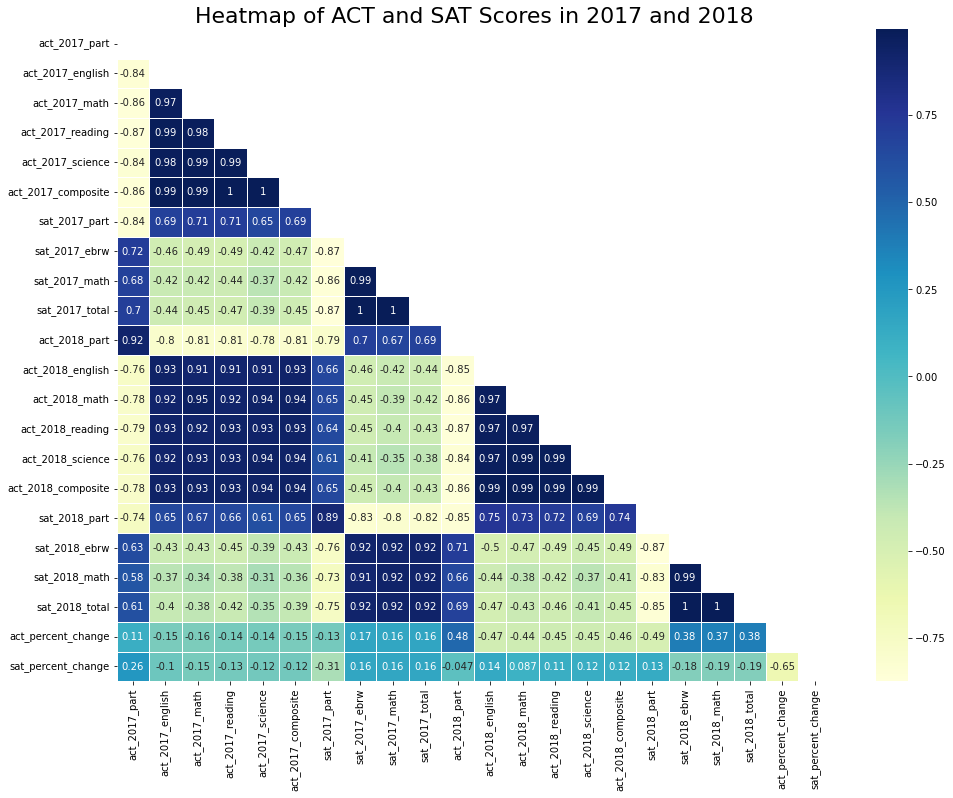

In [94]:
plt.figure(figsize=(16,12))
plt.title('Heatmap of ACT and SAT Scores in 2017 and 2018', fontsize=22)
sns.heatmap(final_df.corr(), linewidths=0.5, cmap='YlGnBu', annot=True, mask=mask);

#### Conclusions of Heatmap
1. Seems like there is a strong negative correlation between participation rate and scores for both the ACT and the SAT.
    * as the average participation rate goes up, the average score of each subject goes down.
   
2. There is a strong positive correlation between scores in 2017 compared to 2018 for both the ACT and the SAT.
    * makes sense. Students will perform similarly from one year to the next, as the school curriculum will mostly stay very similar.
    
3. Students who have taken one type of test is unlikely to take the other.

In [95]:
def subplots(dataframe, list_of_columns, list_of_titles, list_of_xlabels, sharex=False, kde=False, figsize=(14,7)):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize, sharex=sharex, sharey=True)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns):
        mean = np.mean(dataframe[list_of_columns[i]])
        ax[i].axvline(mean, ls='--', color='crimson')
        if 'act_' in column:
            color = 'blue'
        elif 'sat_' in column:
            color = 'red'
        
        sns.histplot(data=dataframe, x=column, color=color, ax=ax[i], kde=kde, bins=10)
        ax[i].set_title(list_of_titles[i] + f'(Mean: {mean:.1f})')
        ax[i].set_xlabel(list_of_xlabels[i])
        if i % 2 == 0:
            ax[i].set_ylabel('Number of States')
    
    fig.tight_layout(h_pad = 1.5, w_pad = 1.5)

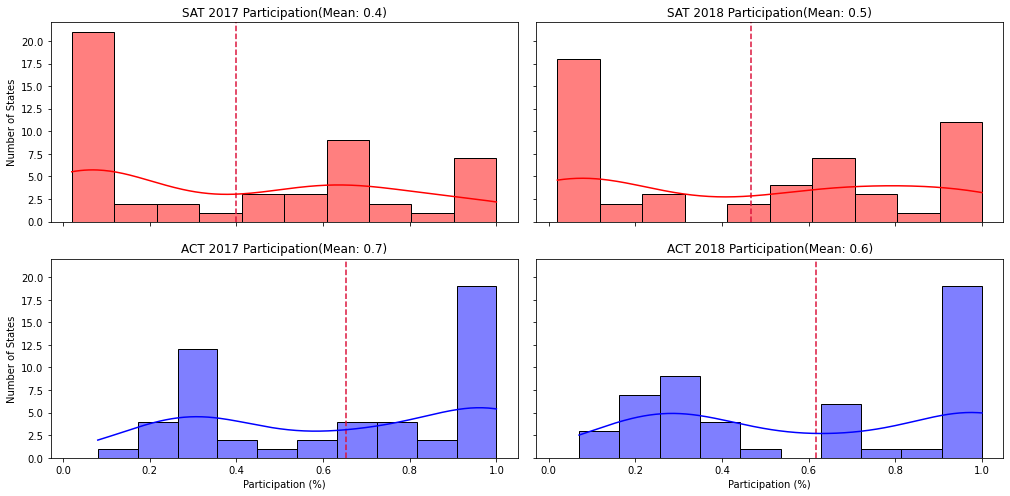

In [96]:
subplots(final_df, ['sat_2017_part', 'sat_2018_part', 'act_2017_part', 'act_2018_part'], 
                   ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation'], 
                   ['Participation (%)', 'Participation (%)', 
                    'Participation (%)', 'Participation (%)'], sharex=True, kde=True)

#### Conclusions
1. There are many states with very low participation rate for the SAT compared to the ACT who have many more states with a very high participation rate

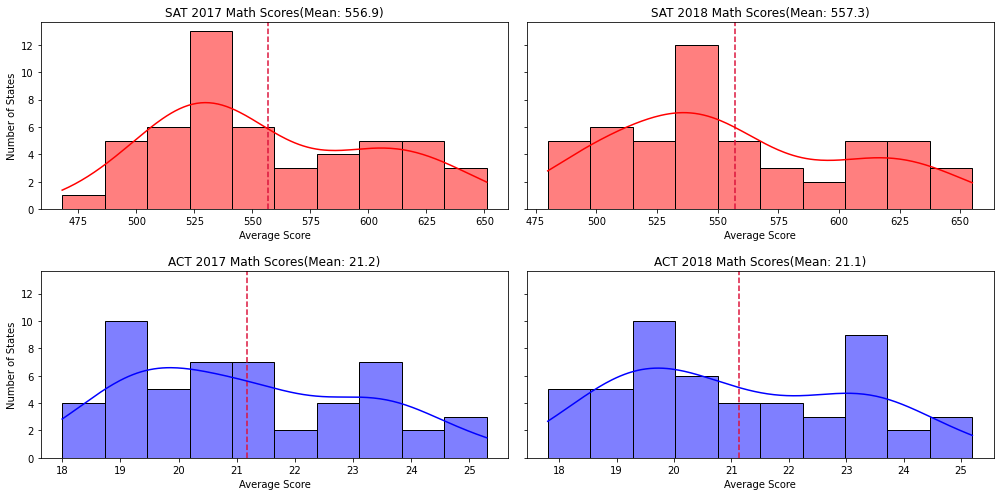

In [97]:
subplots(final_df,
        ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math'], 
        ['SAT 2017 Math Scores', 'SAT 2018 Math Scores', 'ACT 2017 Math Scores', 'ACT 2018 Math Scores'], 
        ['Average Score', 'Average Score', 'Average Score', 'Average Score'], kde=True)

#### Conclusions:
1. No significant change in Math scores for either SAT (0.4 point increase) and ACT (0.1 point decrease)
2. Most Math scores are in the range of 525 and 550.

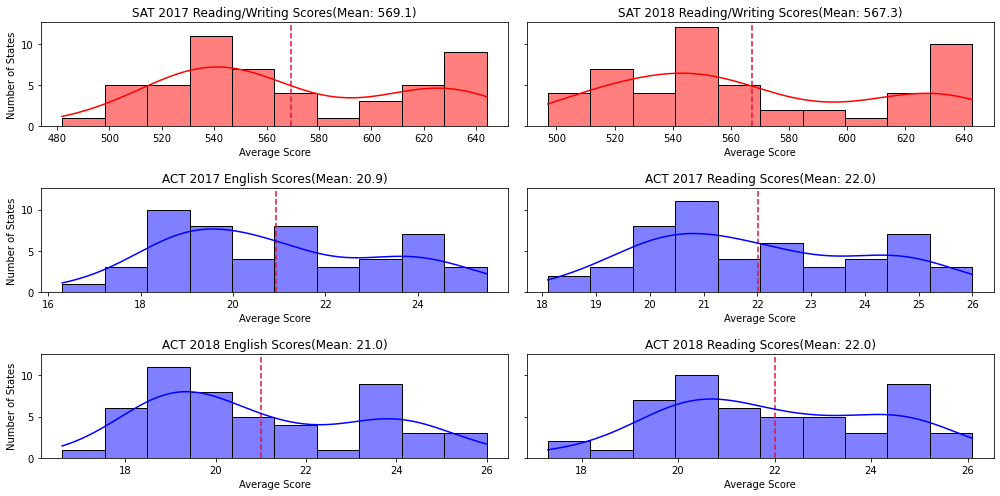

In [98]:
subplots(final_df, 
        ['sat_2017_ebrw', 'sat_2018_ebrw', 'act_2017_english', 'act_2017_reading', 'act_2018_english', 'act_2018_reading'],
        ['SAT 2017 Reading/Writing Scores', 'SAT 2018 Reading/Writing Scores','ACT 2017 English Scores', 'ACT 2017 Reading Scores', 'ACT 2018 English Scores', 'ACT 2018 Reading Scores'],
        ['Average Score', 'Average Score','Average Score', 'Average Score', 'Average Score', 'Average Score'], kde=True)

#### Conclusions
1. The average SAT Reading/Writing score decreased from 569.1 to 567.3 (1.8 points)
2. The average ACT English score increased by 0.1 between 2017 and 2018.
3. The average ACT Reading score remained the same.

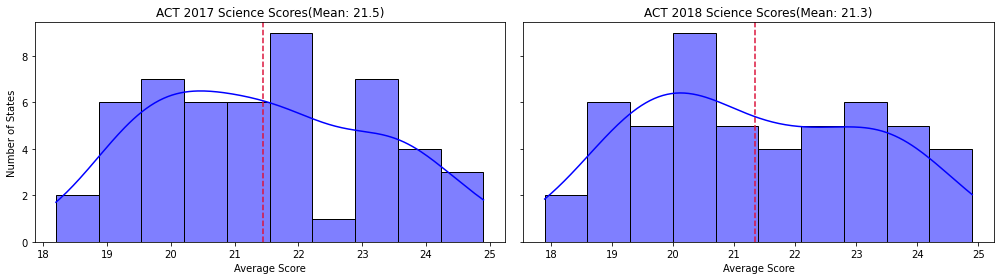

In [99]:
subplots(final_df, 
        ['act_2017_science', 'act_2018_science'],
        ['ACT 2017 Science Scores', 'ACT 2018 Science Scores'],
        ['Average Score', 'Average Score'], kde=True, figsize=(14,4))

#### Conclusion:
The distribution seems to be slightly bimodal, with two peaks, but conclusion is uncertain.

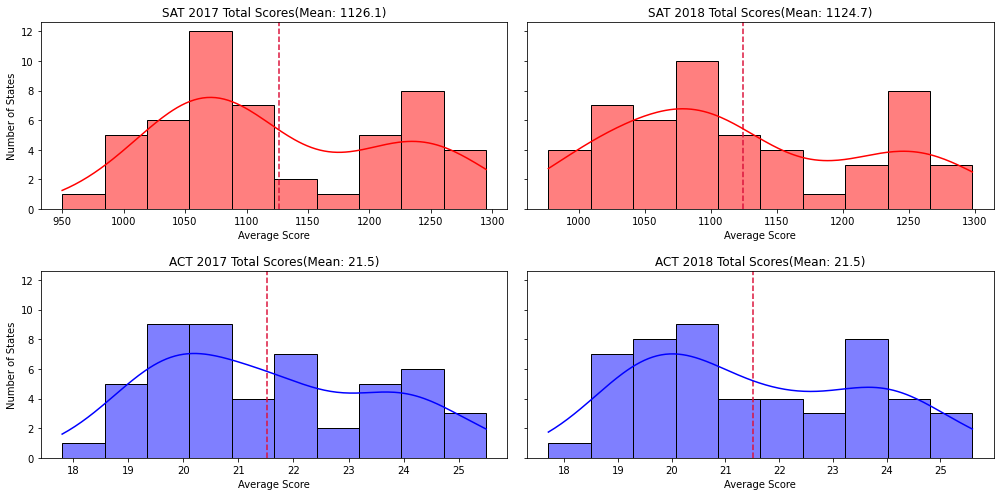

In [100]:
subplots(final_df, 
        ['sat_2017_total', 'sat_2018_total', 'act_2017_composite', 'act_2018_composite'],
        ['SAT 2017 Total Scores', 'SAT 2018 Total Scores', 'ACT 2017 Total Scores', 'ACT 2018 Total Scores'],
        ['Average Score', 'Average Score','Average Score', 'Average Score'], kde=True)

#### Conclusion:
The distribution of the SAT seems to reflect more of a bimodal distribution. Either students in each state perform relatively well, or poor without much of an 'in-between'.

In [120]:
def box_plot(dataframe, list_of_columns, title, list_of_yticklabels, xlabel, test_type=False, palette='tab10', orient='h'):
    plt.figure(figsize=(14,7))
    plt.title(title)
    
    ax = sns.boxplot(data=dataframe[list_of_columns],palette=palette, orient=orient)
    ax.set_yticklabels(list_of_yticklabels)
    ax.set_xlabel(xlabel)

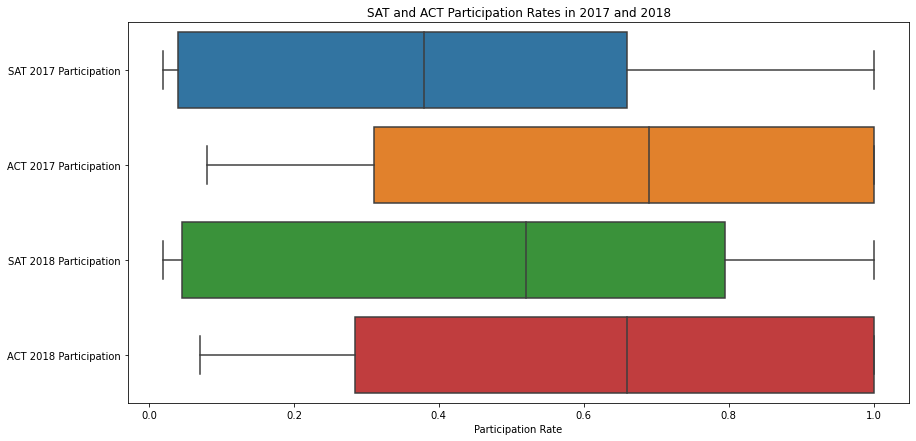

In [121]:
box_plot(final_df, ['sat_2017_part', 'act_2017_part', 'sat_2018_part', 'act_2018_part'],
                    'SAT and ACT Participation Rates in 2017 and 2018', 
                   ['SAT 2017 Participation', 'ACT 2017 Participation', 'SAT 2018 Participation', 'ACT 2018 Participation'], 
                    'Participation Rate', test_type=True)

#### Conclusions:
1. ACT has a higher median than the SAT for both years.
2. The SAT participation rate seems to be increasing, as the median increased from 2017 to 2018 while the ACT dropped a little bit.

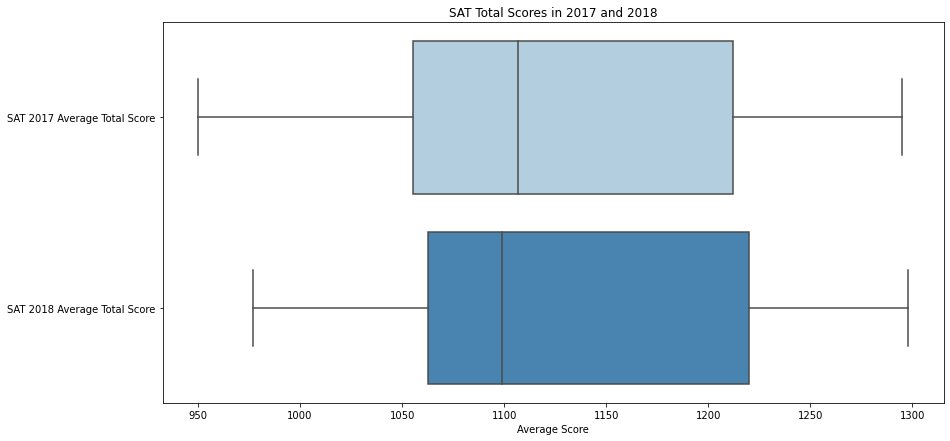

In [122]:
box_plot(final_df, ['sat_2017_total', 'sat_2018_total'], 
         'SAT Total Scores in 2017 and 2018', 
         ['SAT 2017 Average Total Score', 'SAT 2018 Average Total Score'], 'Average Score', palette='Blues')

#### Conclusions:
1. The median of the SAT scores dropped from 2017 to 2018. This could be due to the rise in participation rates in some states.
    - As seen in the heatmap, there is a negative correlation in participation rate and scores.

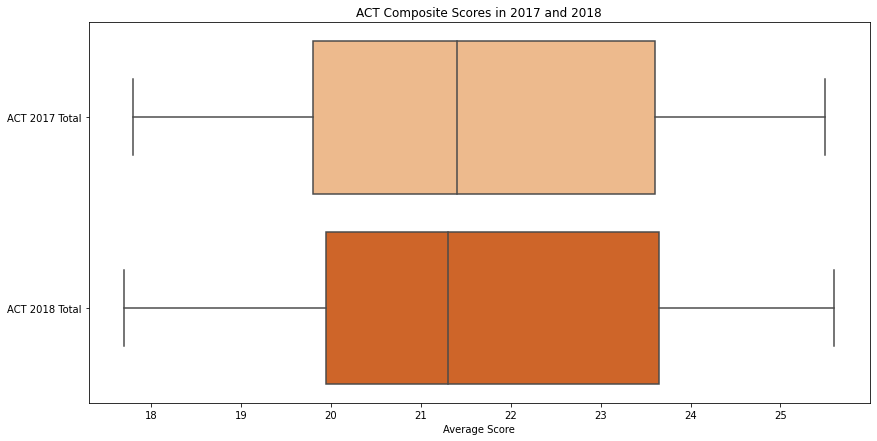

In [124]:
box_plot(final_df, ['act_2017_composite', 'act_2018_composite'], 
         'ACT Composite Scores in 2017 and 2018', ['ACT 2017 Total', 'ACT 2018 Total'], 'Average Score', palette='Oranges')

#### Conclusions:
1. There is a slight decrease in the median for the ACT composite scores.

In [138]:
# Function to plot multiple scatter plots
def multi_plot_scatter(df, list_of_x, list_of_y, list_of_titles, xlabels, ylabels, sharex = False, sharey = False):
    if len(list_of_x) == 1:
        ncols = 1
    else:
        ncols = 2
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,7), sharex = sharex, sharey = sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_x):
        sns_fig = sns.regplot(data=df, x=list_of_x[i], y=list_of_y[i], ax=ax[i]).set_title(list_of_titles[i])
        ax[i].set_xlabel(xlabels[i])
        ax[i].set_ylabel(ylabels[i])
        plt.tight_layout()
        
# Function for plotting single scatter plots
def plot_scatter(df, x, y, title):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    sns.regplot(data=df, x=x, y=y)
    plt.tight_layout()

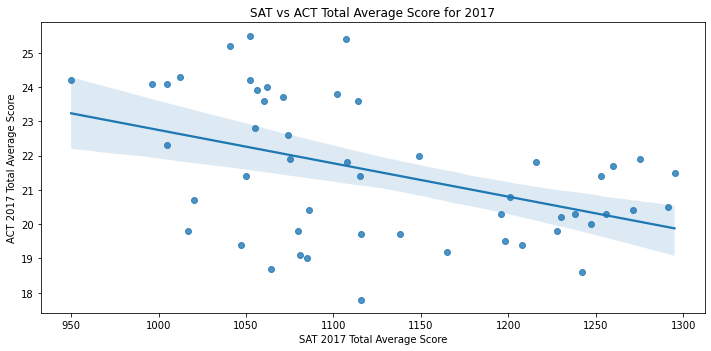

In [142]:
plot_scatter(final_df, 'sat_2017_total', 'act_2017_composite', 'SAT vs ACT Total Average Score for 2017')
plt.xlabel('SAT 2017 Total Average Score')
plt.ylabel('ACT 2017 Total Average Score');

#### Conclusions:
1. ACT and SAT total scores generally have a negative correlation.
    - There may be a focus on study of one test with each state, lacking support for the other resulting in a lower score.

## Conclusions and Recommendations

From the data provided, we can conclude that there was an increase of average SAT particiation between the two years, resulting in an overall lower average score, as proven by the heatmap above. This decrease in performance may be due to the sudden change in test format and the lack of resources from the states that have made this drastic change. In order to solidify the findings of the analysis, it is recommended to observe the states that made the change for a couple more years before making any further changes. If the scores, relative to the ACT, increase in those states, it would be safe to conclude that the change was beneficial, and more states should make the change.

It is crucial to note that there is a continued push against standardized testing and its effectiveness. If each state wants to continue its tradition of standardized testing, it is important to to conduct additional research to support its effectiveness and present it in a way that ties in the SAT/ACT with its success. If they wish to pursue a different path, they should consider other forms of tests that cater to each students' unique characteristics such as assessing a portfolio that was organized throughout the students academic career.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!